In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Regression example

In [10]:
# simulate multiresolution data
num_signals = 100
signal_length = 40 * 2
x = np.linspace(0, 40 * np.pi, signal_length)
signals = [np.random.normal(0, .1, size=signal_length) 
           + (5 * np.sin(.5 * x) + np.random.random() * 10 * np.pi)
           + (5 * np.sin(.1 * x) + np.random.random() * 10 * np.pi)
           + (3 * np.sin(2 * x) + np.random.random() * 10 * np.pi)
          for _ in range(num_signals)]

split = int(num_signals * .8)
train = signals[:split]
test = signals[split:]

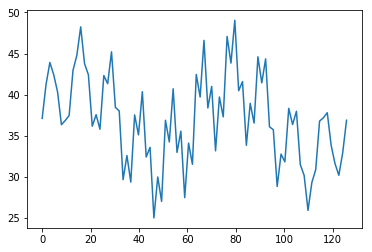

In [11]:
# example signal
plt.plot(x, signals[3]);

In [12]:
# prepare data
train_batches_in = []
train_batches_out = []
batch_size = 2
start = 0
while start + batch_size < len(train):
    batch = train[start: start + batch_size]
    
    train_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    train_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size
    
    
batch_size = 1
start = 0
test_batches_in = []
test_batches_out = []
while start + batch_size < len(test):
    batch = test[start: start + batch_size]
    
    test_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    test_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size

In [5]:
from hmlstm_network import HMLSTMNetwork
import tensorflow as tf

tf.reset_default_graph()
network = HMLSTMNetwork(input_size=1, task='regression', hidden_state_sizes=100,
                       embed_size=100, out_hidden_size=100)

In [13]:
network.train(train_batches_in, train_batches_out, load_existing_vars=True)

loading variables...
INFO:tensorflow:Restoring parameters from hmlstm.ckpt
Epoch 0
loss: 16503.8
loss: 1175.7
loss: 35584.6
loss: 2901.53
loss: 46130.3
loss: 1113.94
loss: 22577.2
loss: 1817.04
loss: 24679.0
loss: 22190.8
loss: 36669.1
loss: 14400.5
loss: 40972.7
loss: 70834.5
loss: 1926.09
loss: 20367.0
loss: 1033.92
loss: 7777.0
loss: 2910.95
loss: 1031.74
loss: 1142.16
loss: 30527.1
loss: 858.021
loss: 1848.6
loss: 964.295
loss: 600.79
loss: 2794.27
loss: 24974.1
loss: 23130.6
loss: 304.451
loss: 758.861
loss: 289.047
loss: 14176.2
loss: 3093.98
loss: 14355.6
loss: 914.407
loss: 644.581
loss: 1122.95
loss: 981.721
Epoch 1
loss: 11034.2
loss: 621.287
loss: 25859.1
loss: 773.493
loss: 37593.0
loss: 744.616
loss: 17409.8
loss: 831.747
loss: 18572.5
loss: 16526.3
loss: 30006.6
loss: 10492.8
loss: 33032.8
loss: 59558.0
loss: 816.586
loss: 14981.3
loss: 331.093
loss: 5126.33
loss: 1439.25
loss: 664.701
loss: 350.399
loss: 23248.9
loss: 493.879
loss: 1003.86
loss: 588.165
loss: 406.769
los

In [15]:
boundaries = network.predict_boundaries(test_batches_in[5][0])
print(boundaries)

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
loading variables...
INFO:tensorflow:Restoring parameters from hmlstm.ckpt
[[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
    0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.
    0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.
    0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.
    0.  0.  0.  0.  0.  1.  0.]
  [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [16]:
predictions = network.predict(test_batches_in[5][0])
print(predictions)

loading variables...
INFO:tensorflow:Restoring parameters from hmlstm.ckpt
[[[ 31.56249809]]

 [[ 27.0261116 ]]

 [[ 18.36811066]]

 [[ 19.03183937]]

 [[ 17.84014702]]

 [[ 15.7991209 ]]

 [[ 16.47100258]]

 [[ 21.33816147]]

 [[ 24.27433395]]

 [[ 27.43211746]]

 [[ 22.89185524]]

 [[ 22.24271965]]

 [[ 16.0105896 ]]

 [[ 16.3763504 ]]

 [[ 15.06480598]]

 [[ 21.45842171]]

 [[ 21.02712631]]

 [[ 25.72398376]]

 [[ 17.4431076 ]]

 [[ 18.15254784]]

 [[ 11.81361771]]

 [[ 11.84144402]]

 [[  8.35446262]]

 [[ 16.26259995]]

 [[ 14.32412529]]

 [[ 19.97735405]]

 [[ 11.29563999]]

 [[ 12.9953289 ]]

 [[  8.61550236]]

 [[  9.03240967]]

 [[  5.59842587]]

 [[ 14.45519638]]

 [[ 14.21382713]]

 [[ 18.86957169]]

 [[ 11.37447262]]

 [[ 13.98530388]]

 [[  9.55790615]]

 [[ 11.41515827]]

 [[ 10.22733974]]

 [[ 20.3506813 ]]

 [[ 18.19117546]]

 [[ 24.8731575 ]]

 [[ 16.90753937]]

 [[ 19.11117744]]

 [[ 13.2093935 ]]

 [[ 17.40515327]]

 [[ 15.03813076]]

 [[ 25.21801758]]

 [[ 21.728441

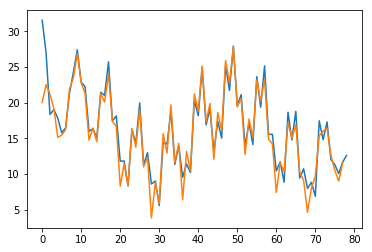

In [17]:
plt.plot(predictions.flatten())
plt.plot(test_batches_in[5][0][1:])

### Text classificaiton example

In [19]:
from text_input_utils import prepare_inputs

tf.reset_default_graph()
network = HMLSTMNetwork(output_size=29, input_size=29,
                        embed_size=10, out_hidden_size=10,
                        hidden_state_sizes=10)

In [ ]:
batch_size = 2
truncate_len = 100
num_layers = 3
num_batches = 20

inputs = prepare_inputs(
    batch_size=batch_size, truncate_len=truncate_len, num_batches=num_batches)

In [ ]:
# test on last input
print(len(inputs[0]))
network.train(inputs[0][:-1], inputs[1][:-1], load_existing_vars=True)

20
loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt


In [22]:
# predictions on last input
predictions = network.predict(inputs[0][-1], reuse=True)
predictions

0
1
2
0
1
2
loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt


ValueError: Cannot feed value of shape (1, 2, 100, 29) for Tensor 'batch_in:0', which has shape '(?, ?, 29)'

In [ ]:
# predictions on last input
indicators = network.predict_boundaries(inputs[0][-1], reuse=True)